In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("scaled_dataset.csv")
df['name_lower'] = df['name'].str.lower()

# Set theme
sns.set(style="whitegrid")


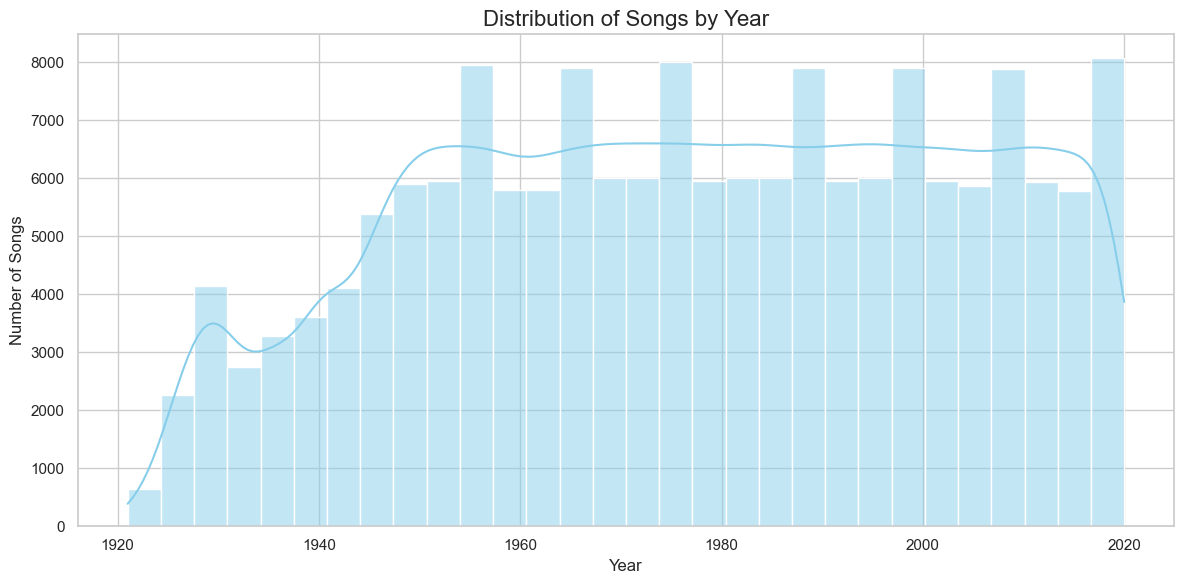

In [2]:
plt.figure(figsize=(12, 6))
sns.histplot(df['year'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Songs by Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_17220\3845903541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")


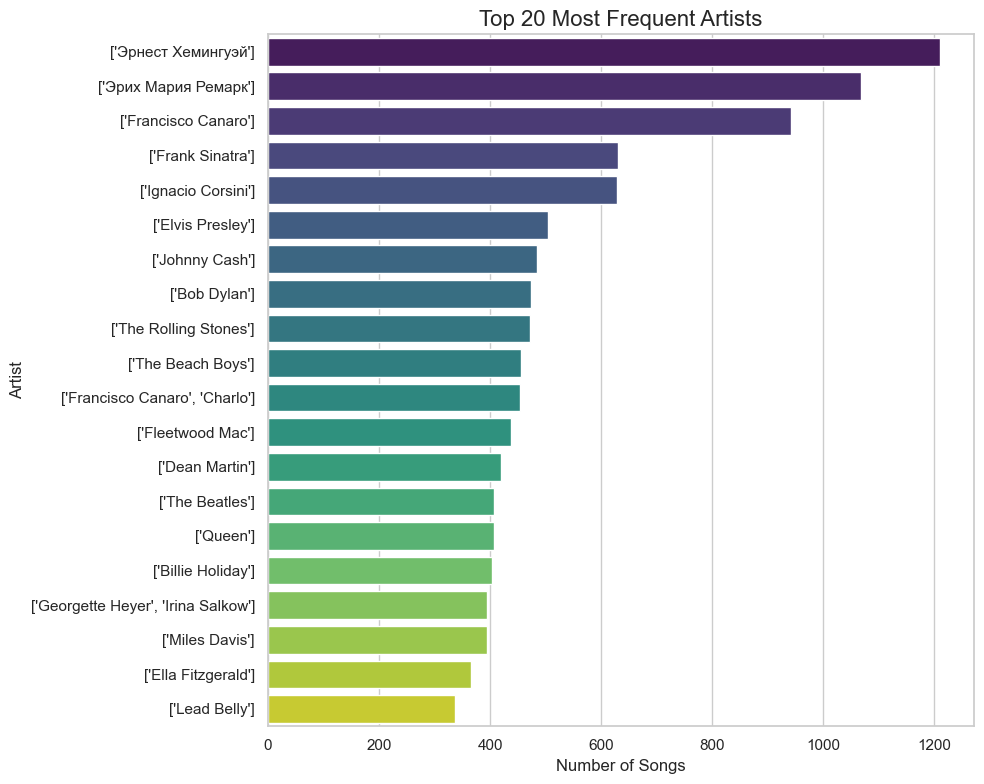

In [3]:
top_artists = df['artists'].value_counts().head(20)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")
plt.title("Top 20 Most Frequent Artists", fontsize=16)
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_17220\2687642521.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="danceability", estimator="mean", ci=None)


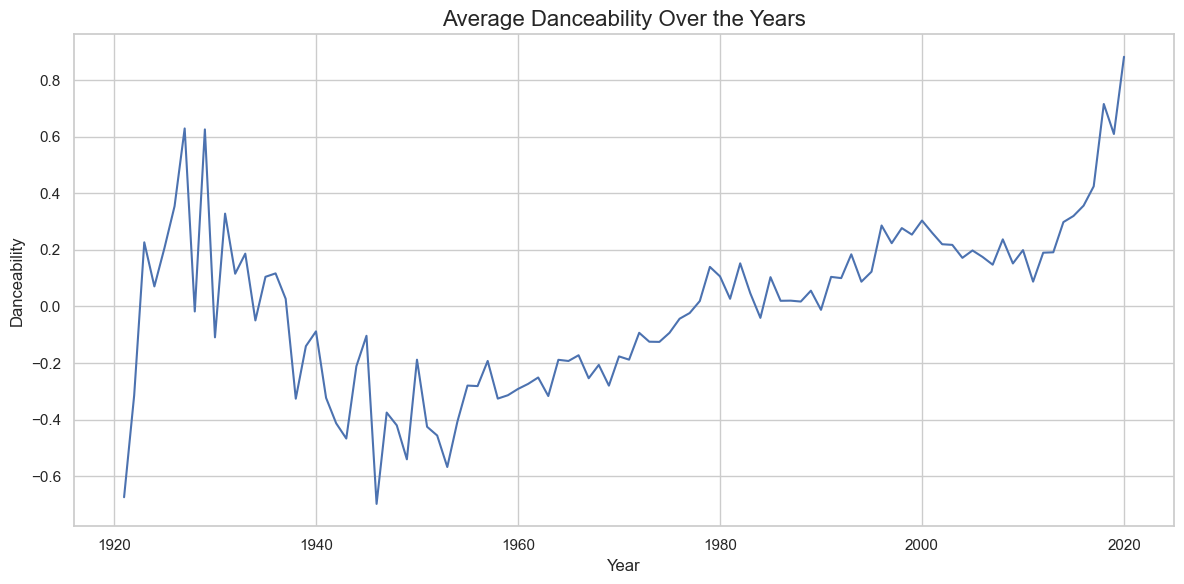

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="danceability", estimator="mean", ci=None)
plt.title("Average Danceability Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.tight_layout()
plt.show()


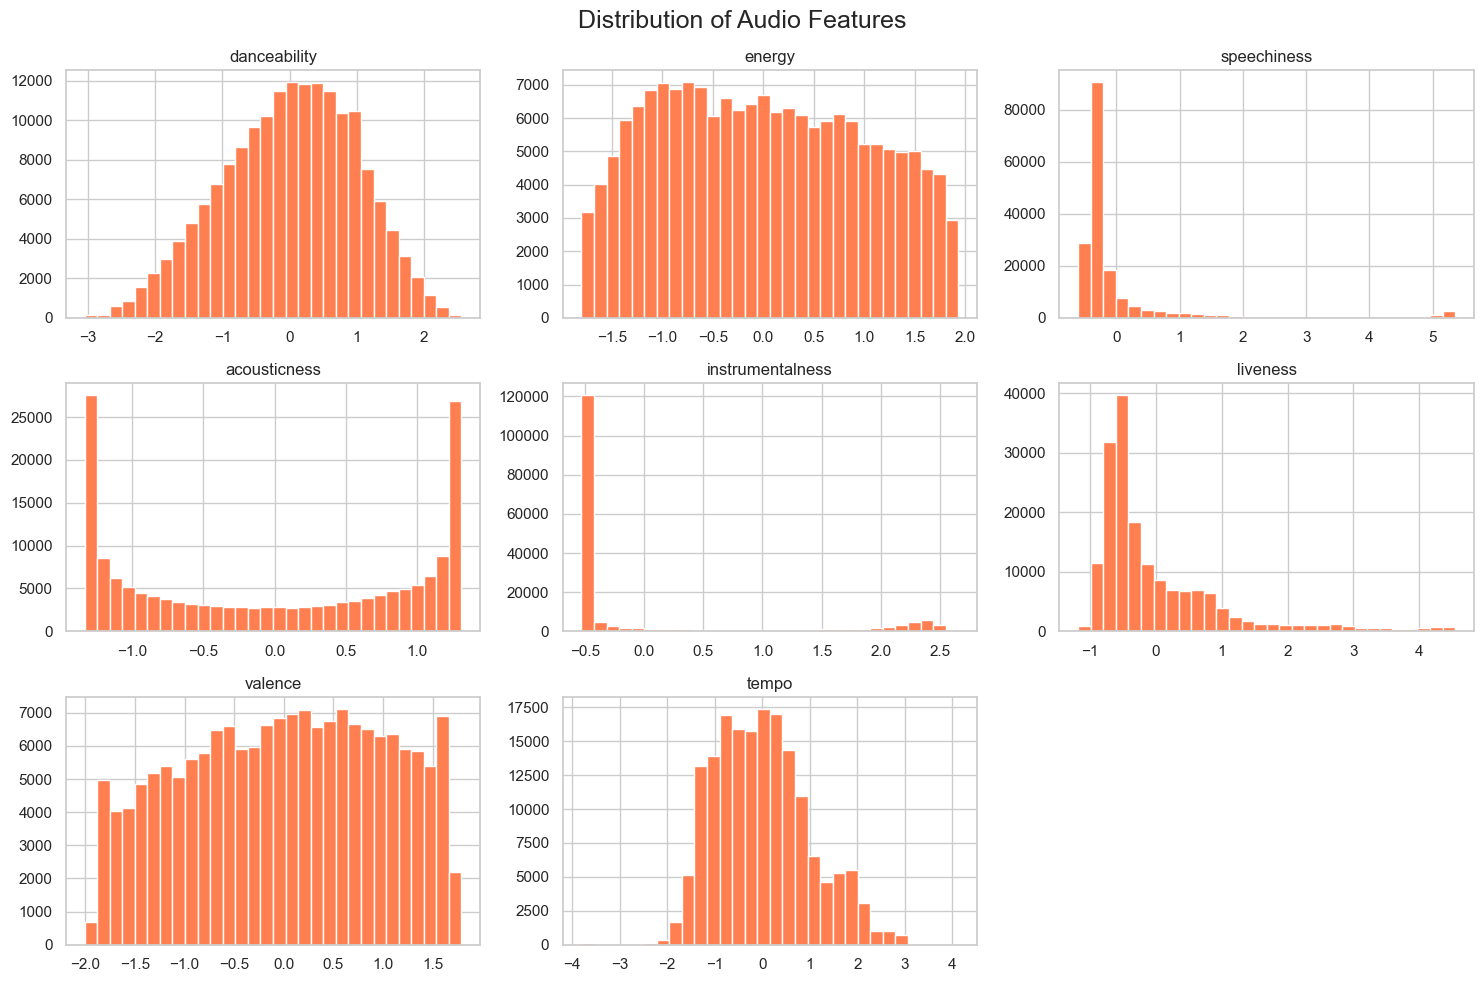

In [5]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']

df[features].hist(bins=30, figsize=(15, 10), color='coral')
plt.suptitle("Distribution of Audio Features", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


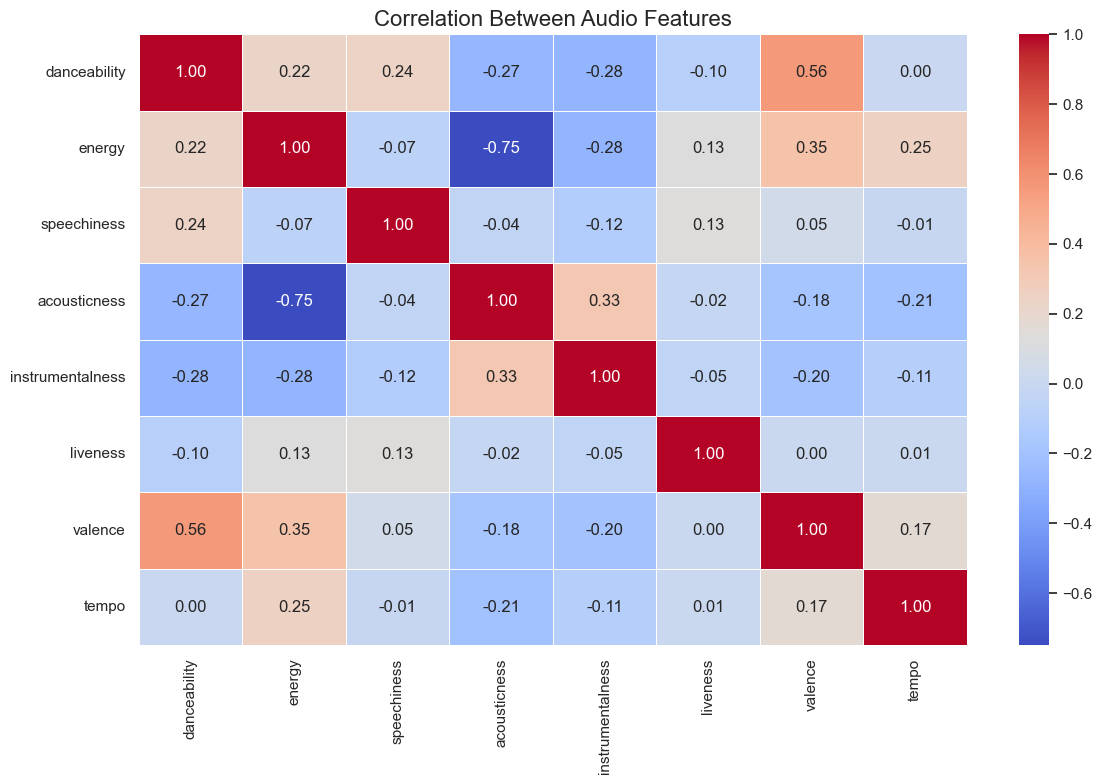

In [6]:
plt.figure(figsize=(12, 8))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Audio Features", fontsize=16)
plt.tight_layout()
plt.show()


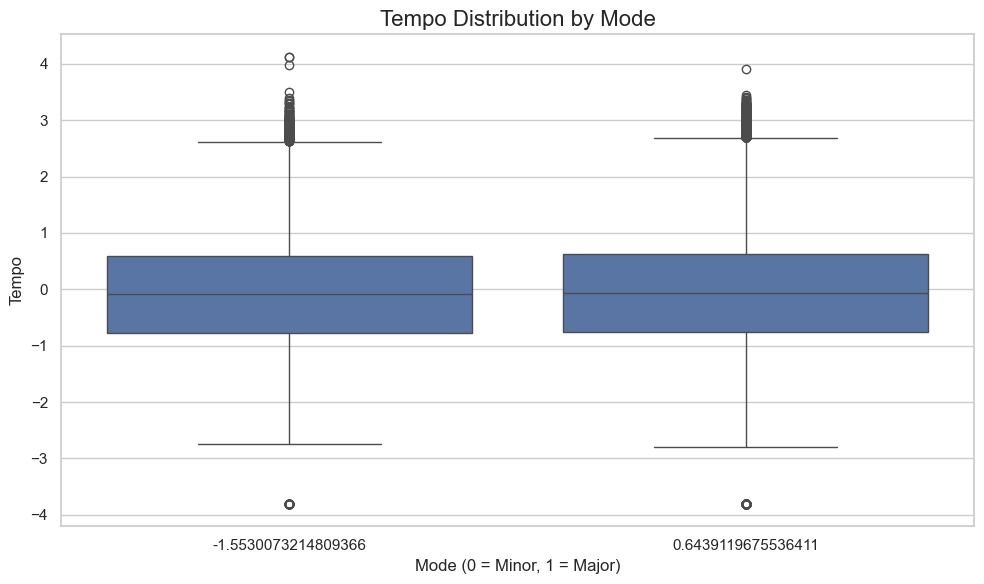

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="mode", y="tempo")
plt.title("Tempo Distribution by Mode", fontsize=16)
plt.xlabel("Mode (0 = Minor, 1 = Major)")
plt.ylabel("Tempo")
plt.tight_layout()
plt.show()


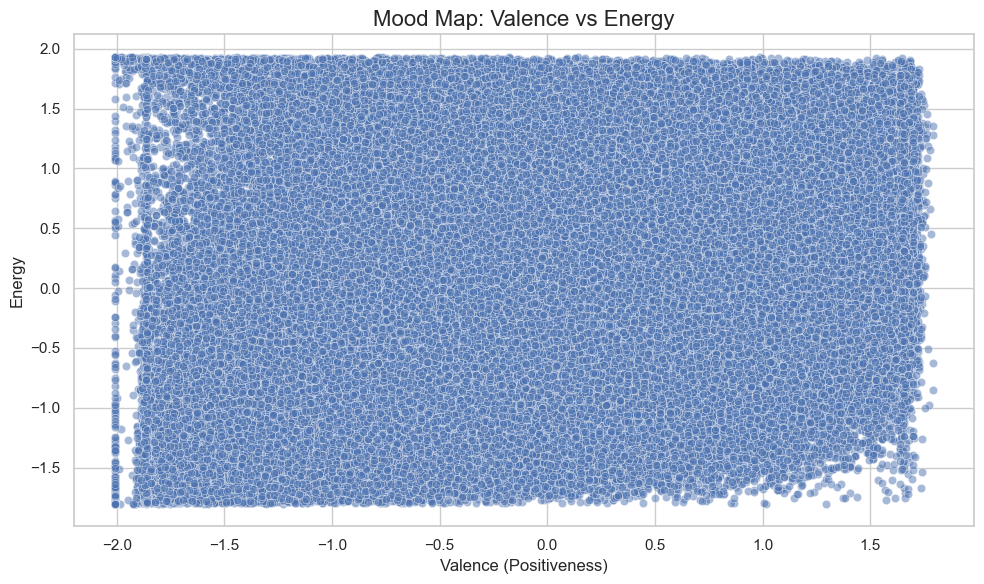

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="valence", y="energy", alpha=0.5)
plt.title("Mood Map: Valence vs Energy", fontsize=16)
plt.xlabel("Valence (Positiveness)")
plt.ylabel("Energy")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to use for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo']

X = df[features]

# Apply KMeans with a chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


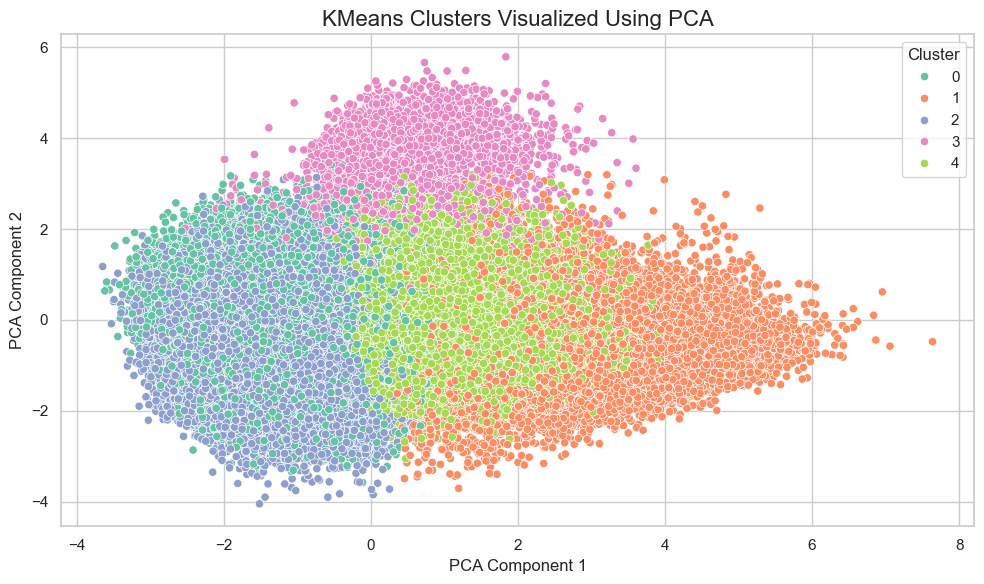

In [10]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("KMeans Clusters Visualized Using PCA", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.tight_layout()
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_17220\2799502344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cluster', palette='Set2')


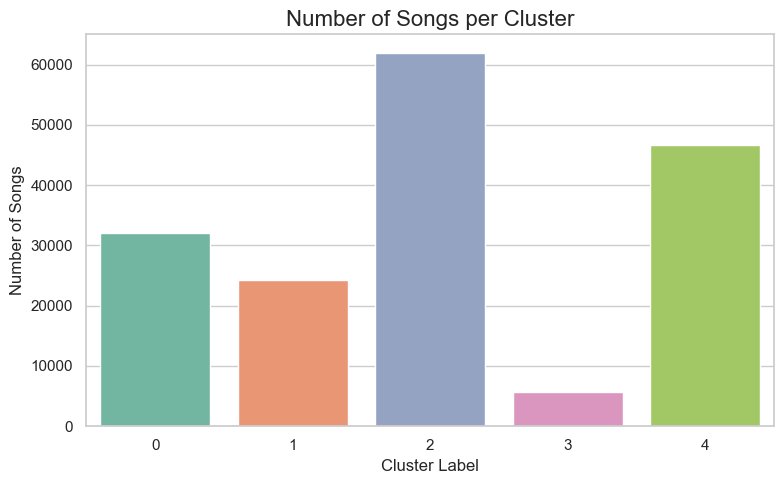

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cluster', palette='Set2')
plt.title("Number of Songs per Cluster", fontsize=16)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()


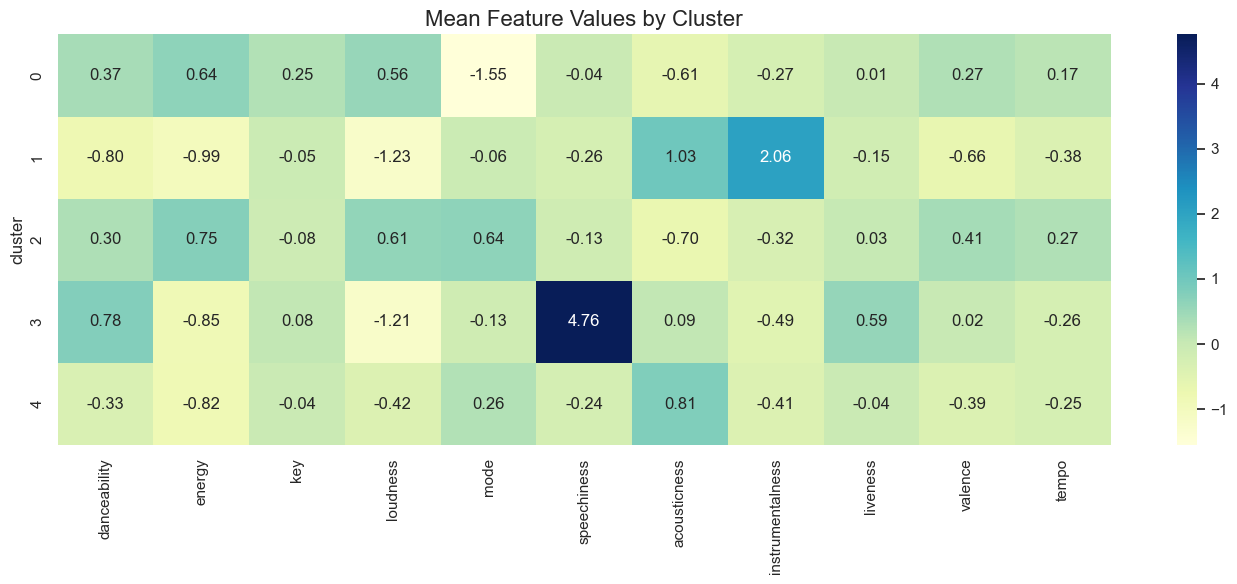

In [12]:
cluster_means = df.groupby('cluster')[features].mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mean Feature Values by Cluster", fontsize=16)
plt.tight_layout()
plt.show()

